#### Import Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import subprocess

#### Run Executable Files 

In [2]:
path     = "../build/"
exeFiles = ["vector_O0N", "vector_O1N", "vector_O2N", "vector_O3N", "vector_O3F"]

for f in exeFiles:
    os.system(path + f)

#### Load Result Data File

In [3]:
dataFiles = [f for f in os.listdir() if ".json" in f]
dic   = {}

for f in dataFiles:
    dic[f[:-5]] = pd.read_json(f)

#### Dataframe Formatting

In [4]:
dicDataframe = {}
MAXSIZE = 10000000
size = []
i = 1000

while(i < MAXSIZE):
    size.append(i)
    i*=10
    
for target, subClassDic in dic.items(): 
    dicDataframe[target] = {}
    
    for className, values in subClassDic.items(): 
        key = values.keys()
        dicDataframe[target][className] = pd.DataFrame({"Vector Size": size, 
                                                 key[0] + target[-4:]: values[key[0]], 
                                                 key[1] + target[-4:]: values[key[1]]}).set_index(["Vector Size"])

#### Log

In [22]:
def con(subClass, tipe):
    l = []
    for key, value in dicDataframe.items():
        l.append(value[subClass]["Mean" + key[-4:]])
    
    return pd.concat(l, axis = 1)


In [23]:
df = con("Log", "Mean")
df.head()

,Mean_O3N,Mean_O3F,Mean_O1N,Mean_O2N,Mean_O0N
Vector Size,,,,,
1000,0.000014,0.000031,0.000018,0.000019,0.000019
10000,0.000101,0.000165,0.000102,0.000100,0.000154
100000,0.001139,0.001556,0.000974,0.000974,0.001537
1000000,0.009842,0.015527,0.009884,0.009775,0.016154


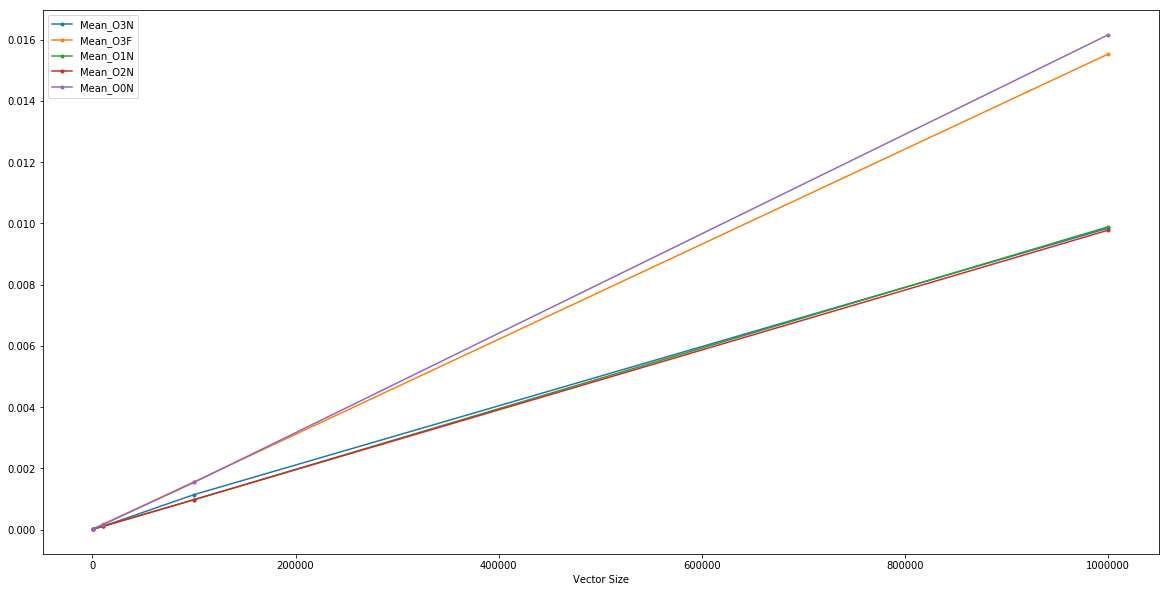

In [24]:
df.plot.line(style='.-', figsize = (20,10))

#### Sqrt

In [25]:
df = con("Sqrt", "Mean")
df

,Mean_O3N,Mean_O3F,Mean_O1N,Mean_O2N,Mean_O0N
Vector Size,,,,,
1000,0.000008,0.000002,0.000007,0.000007,0.000007
10000,0.000067,0.000024,0.000073,0.000067,0.000069
100000,0.000685,0.000235,0.000730,0.000686,0.000688
1000000,0.006718,0.002377,0.007071,0.006869,0.006883


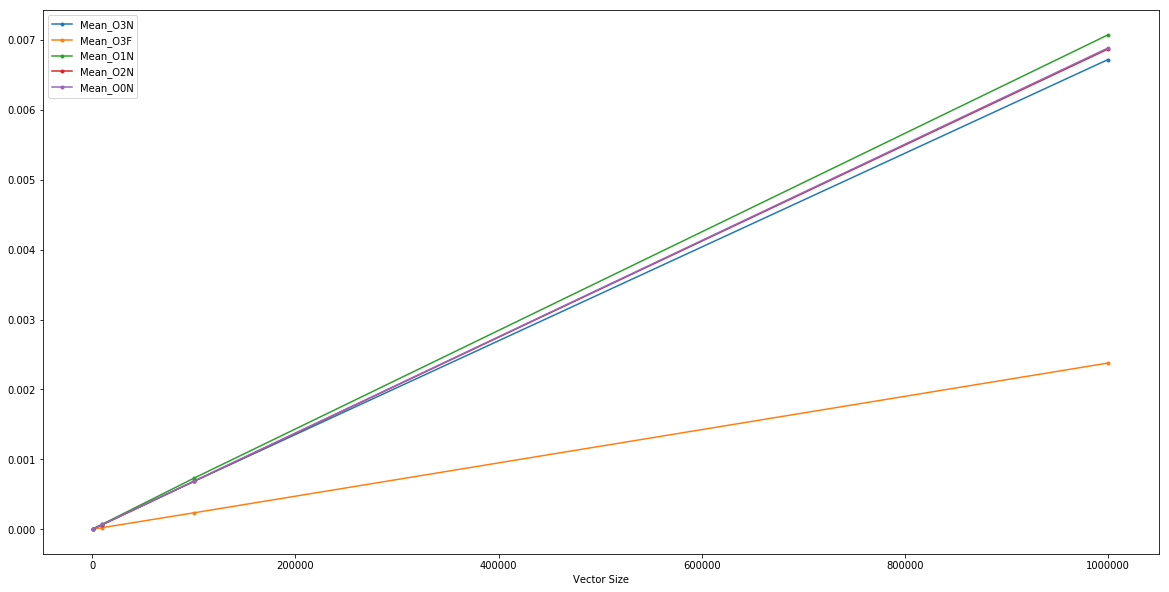

In [26]:
df.plot.line(style='.-', figsize = (20,10))

#### Pow3

In [27]:
df = con("Pow3", "Mean")
df

,Mean_O3N,Mean_O3F,Mean_O1N,Mean_O2N,Mean_O0N
Vector Size,,,,,
1000,0.000040,2.349000e-07,0.000039,0.000041,0.000048
10000,0.000345,2.809200e-06,0.000343,0.000349,0.000434
100000,0.003539,4.392770e-05,0.003443,0.003512,0.004482
1000000,0.034650,7.914399e-04,0.034492,0.034885,0.043639


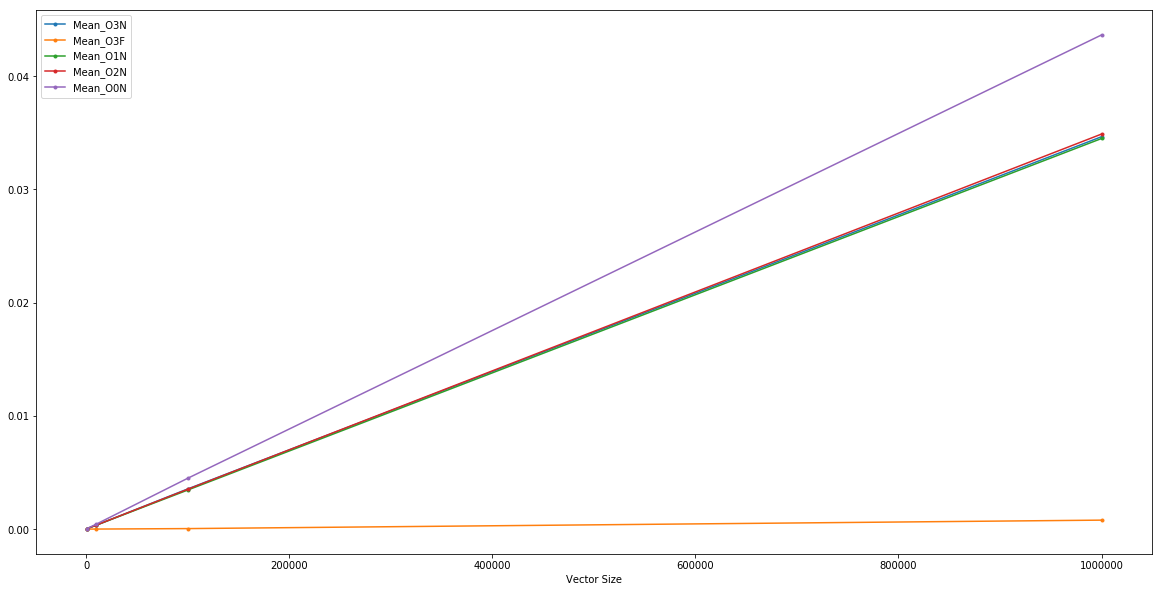

In [28]:
df.plot.line(style='.-', figsize = (20,10))

#### Pow3Mult

In [29]:
df = con("Pow3Mult", "Mean")
df

,Mean_O3N,Mean_O3F,Mean_O1N,Mean_O2N,Mean_O0N
Vector Size,,,,,
1000,4.349000e-07,2.540000e-07,0.000001,6.514000e-07,0.000006
10000,3.459500e-06,2.928500e-06,0.000008,6.219100e-06,0.000062
100000,4.830110e-05,4.404490e-05,0.000084,6.768740e-05,0.000625
1000000,8.152936e-04,7.910559e-04,0.001035,9.206897e-04,0.006213


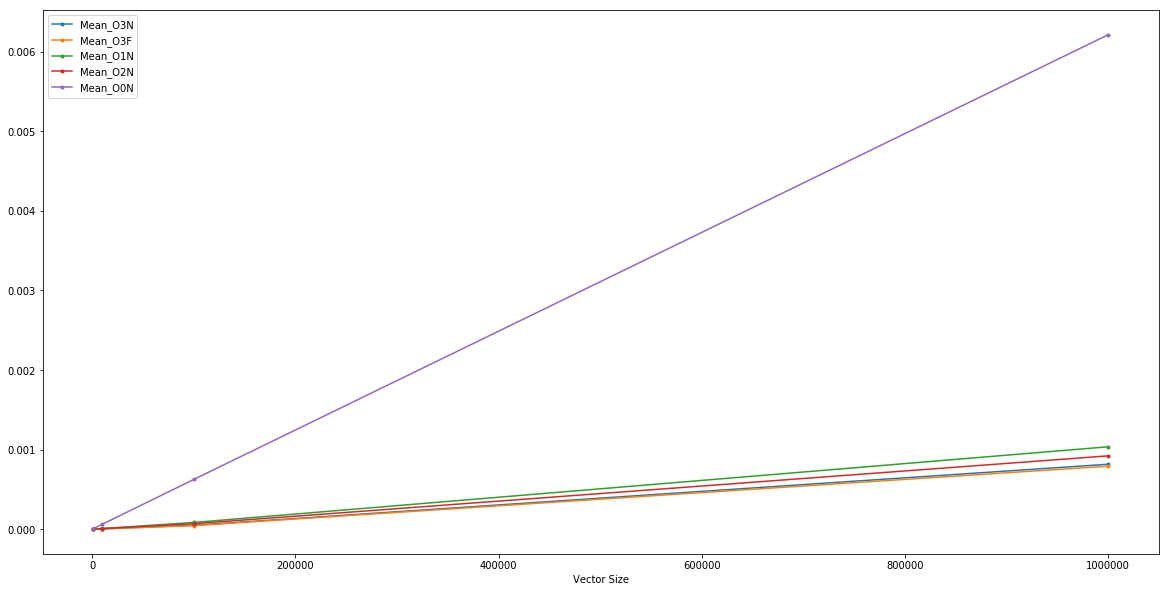

In [30]:
df.plot.line(style='.-', figsize = (20,10))

#### Sum

In [31]:
df = con("Sum", "Mean")
df

,Mean_O3N,Mean_O3F,Mean_O1N,Mean_O2N,Mean_O0N
Vector Size,,,,,
1000,6.680000e-08,3.690000e-08,4.072000e-07,4.440000e-08,0.000004
10000,2.780000e-08,2.370000e-08,3.374800e-06,3.210000e-08,0.000039
100000,3.070000e-08,2.440000e-08,3.344430e-05,3.380000e-08,0.000406
1000000,4.920000e-08,3.890000e-08,3.373895e-04,5.440000e-08,0.003962


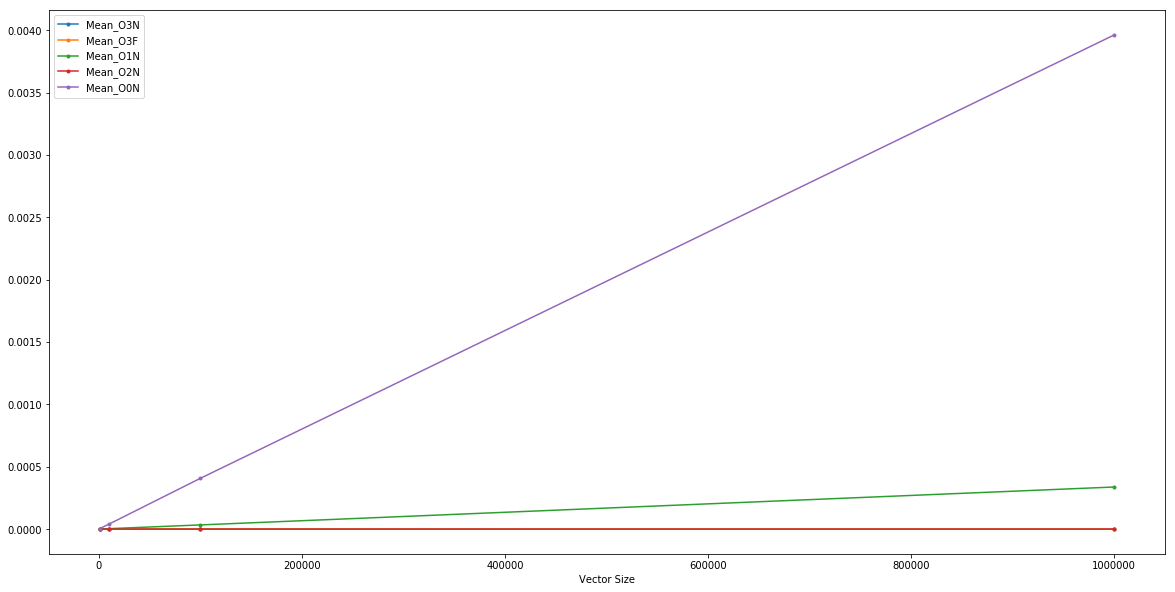

In [35]:
df.plot.line(style='.-', figsize = (20,10))